In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_uniform
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scipy.stats import uniform as sp_uniform
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/strongdrink.txt',na_values = '?')
df.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.describe()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,1.926136,13.006534,2.327159,2.367386,19.492045,99.840909,2.298920,2.043352,0.359545,1.597727,5.031761,0.961000,2.623409,748.477273
std,0.771047,0.814431,1.117747,0.275617,3.355821,14.329499,0.627333,0.995579,0.123046,0.571958,2.317965,0.227225,0.705369,316.208737
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.597500,2.210000,17.175000,88.000000,1.747500,1.242500,0.267500,1.250000,3.200000,0.790000,1.990000,500.000000
50%,2.000000,13.050000,1.845000,2.360000,19.500000,98.000000,2.380000,2.155000,0.340000,1.560000,4.640000,0.975000,2.780000,673.500000
75%,3.000000,13.682500,3.047500,2.560000,21.500000,107.250000,2.800000,2.882500,0.430000,1.952500,6.147500,1.120000,3.172500,986.250000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# 1 

## a)

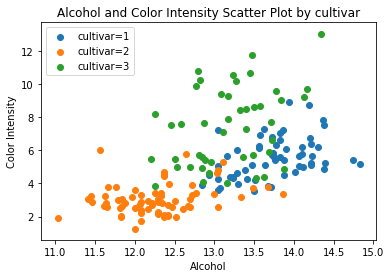

In [4]:
for i in range(1,4):
    temp=df[df['cultivar']==i]
    plt.scatter(temp['alco'],temp['color_int'],label='cultivar='+str(i))

plt.legend()
plt.xlabel("Alcohol") 
plt.ylabel("Color Intensity")
plt.title("Alcohol and Color Intensity Scatter Plot by cultivar")
plt.show()

## b) multinomial logistic model

In [5]:
Xvars = df[['alco', 'malic', 'tot_phen', 'color_int']]
yvars = df['cultivar']
Xvars = StandardScaler().fit_transform(Xvars)

In [6]:
mlm = LogisticRegression()

param_dist1 = {'penalty': ['l1', 'l2'],
               'C': sp_uniform(0.1, 10.0)}
random_search1 = RandomizedSearchCV(mlm, param_distributions=param_dist1, 
                                    n_iter=200, n_jobs=-1, cv=5, random_state=25, 
                                    scoring='neg_mean_squared_error')
result1 = random_search1.fit(Xvars, yvars)

print('Best tuning parameters = ', result1.best_params_)
print('MSE of optimal results = ', abs(result1.best_score_))

Best tuning parameters =  {'C': 1.8170437946794404, 'penalty': 'l2'}
MSE of optimal results =  0.09571428571428572


## c) random forest model

In [7]:
param_dist2 = {'n_estimators': (10, 200),
                'max_depth': (2, 4),
                'min_samples_split': sp_randint(2, 20),
                'min_samples_leaf': sp_randint(2, 20),
                'max_features': sp_randint(1, 4)}

rf = RandomForestClassifier(bootstrap=True, oob_score=True)
random_search2 = RandomizedSearchCV(rf, param_distributions=param_dist2,
                                    n_iter=200, n_jobs=-1, cv=5, random_state=25, 
                                    scoring='neg_mean_squared_error')
result2 = random_search2.fit(Xvars, yvars)
print('Optimal tuning parameters: ', result2.best_params_)
print('MSE of the optimal results: ', abs(result2.best_score_))

Optimal tuning parameters:  {'max_depth': 4, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 14, 'n_estimators': 10}
MSE of the optimal results:  0.13555555555555557


## d) SVC

In [8]:
param_dist3 = {'C': sp_uniform(loc=0.1, scale=10.0),
                'gamma': ['scale', 'auto'],
                'shrinking': [True, False]}
svc = SVC(kernel='rbf')
random_search3 = RandomizedSearchCV(svc, param_distributions=param_dist3, 
                                    n_iter=200, n_jobs=-1, cv=5, random_state=25, 
                                    scoring='neg_mean_squared_error')
result3 = random_search3.fit(Xvars, yvars)
print('Optimal tuning parameters: ', result3.best_params_)
print('MSE of the optimal results: ', abs(result3.best_score_))

Optimal tuning parameters:  {'C': 2.8883894070106906, 'gamma': 'auto', 'shrinking': False}
MSE of the optimal results:  0.08952380952380953


## e) neural network

In [9]:
param_dist4 = {'hidden_layer_sizes': sp_randint(1, 100),
                'activation': ['logistic', 'relu'],
                'alpha': sp_uniform(0.1, 10.0)}

mlp = MLPClassifier(solver='lbfgs',max_iter=500)
random_search4 = RandomizedSearchCV(mlp, param_distributions=param_dist4,
                                    n_iter=200, n_jobs=-1, cv=5, random_state=25, 
                                    scoring='neg_mean_squared_error')
result4 = random_search4.fit(Xvars, yvars)
print('Optimal tuning parameters: ', result4.best_params_)
print('MSE of the optimal results: ', abs(result4.best_score_))

Optimal tuning parameters:  {'activation': 'relu', 'alpha': 1.6599670753042983, 'hidden_layer_sizes': 89}
MSE of the optimal results:  0.0842857142857143


## f)

In [10]:
methods = ["Logistic Regression", "Random Forest",
           "SVM","Neural Network"]
mse = [abs(result1.best_score_),abs(result2.best_score_),
       abs(result3.best_score_),abs(result4.best_score_)]
for i in range(4):
    print("{}\'s MSE is {}.".format(methods[i],mse[i]))

Logistic Regression's MSE is 0.09571428571428572.
Random Forest's MSE is 0.13555555555555557.
SVM's MSE is 0.08952380952380953.
Neural Network's MSE is 0.0842857142857143.


Among logistic regression, random forest, SVM and nueral network, I think neural network is the best, since it induces the smallest mean squared error.